In [158]:
import pandas as pd
data = pd.DataFrame(data={'x':[1,1.5,2,2.5,3,3,0.8,4.7,5],
                           'y':[0,2.3,1,4,2,3,2,3.2,3.5]})

In [159]:
data

,x,y
0,1.0,0.0
1,1.5,2.3
2,2.0,1.0
3,2.5,4.0
4,3.0,2.0
5,3.0,3.0
6,0.8,2.0
7,4.7,3.2
8,5.0,3.5


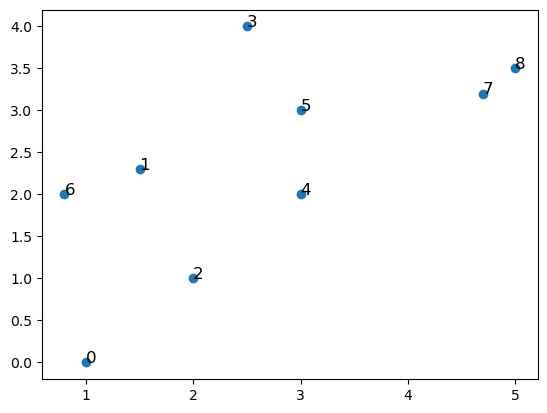

In [160]:
import matplotlib.pyplot as plt
plt.scatter(data.x,data.y)

values = [0,1,2,3,4,5,6,7,8]
for index,value in enumerate(values):
    plt.annotate(value,(data.x[index],data.y[index]),size=12)
    

Text(0.5, 1.0, 'Drendrogram')

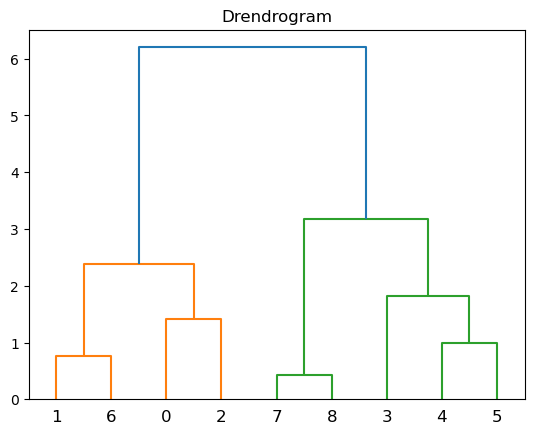

In [161]:
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(data,method='ward'))
plt.title("Drendrogram")

In [162]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
predictions = model.fit_predict(data)

In [163]:
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [164]:
data['cluster'] = predictions

In [165]:
data

,x,y,cluster
0,1.0,0.0,1
1,1.5,2.3,1
2,2.0,1.0,1
3,2.5,4.0,0
4,3.0,2.0,0
5,3.0,3.0,0
6,0.8,2.0,1
7,4.7,3.2,0
8,5.0,3.5,0


In [166]:
c1 = data[data['cluster']==1]
c1

,x,y,cluster
0,1.0,0.0,1
1,1.5,2.3,1
2,2.0,1.0,1
6,0.8,2.0,1


In [167]:
c2 = data[data['cluster']==0]
c2

,x,y,cluster
3,2.5,4.0,0
4,3.0,2.0,0
5,3.0,3.0,0
7,4.7,3.2,0
8,5.0,3.5,0


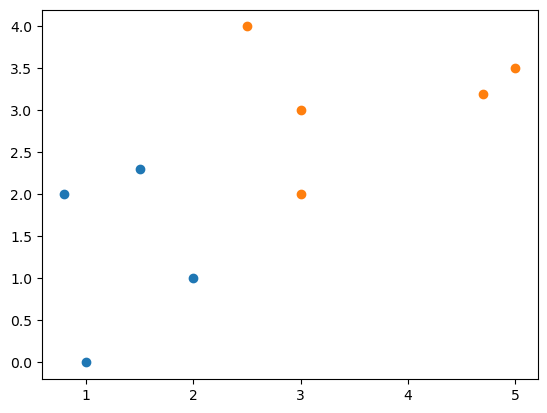

In [168]:
plt.scatter(c1.x,c1.y)
plt.scatter(c2.x,c2.y)

In [187]:
new_model = AgglomerativeClustering(n_clusters=3,metric='manhattan',linkage='complete')
new_predictions = new_model.fit_predict(data)
new_predictions

array([0, 0, 0, 1, 1, 1, 0, 2, 2], dtype=int64)

In [189]:
data['new_cluster'] = new_predictions

In [191]:
data

,x,y,cluster,new_cluster
0,1.0,0.0,1,0
1,1.5,2.3,1,0
2,2.0,1.0,1,0
3,2.5,4.0,0,1
4,3.0,2.0,0,1
5,3.0,3.0,0,1
6,0.8,2.0,1,0
7,4.7,3.2,0,2
8,5.0,3.5,0,2


In [195]:
new_c1 = data[data['new_cluster']==0]
new_c2 = data[data['new_cluster']==1]
new_c3 = data[data['new_cluster']==2]

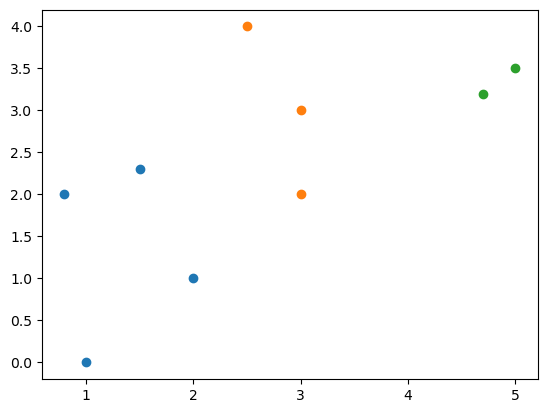

In [209]:
plt.scatter(new_c1.x,new_c1.y)
plt.scatter(new_c2.x,new_c2.y)
plt.scatter(new_c3.x,new_c3.y)